# Opencv_superresolution

 This notebook is a quick review about superresolution. I will follow the Adrian's blog from : https://pyimagesearch.com/2020/11/09/opencv-super-resolution-with-deep-learning/?_ga=2.96535007.1725668903.1675464178-1130789896.1638882117
 
 Images and theorical explanations are taken from that block. I will just add small details about subjects and how code blocks work.

Super resolution encompases a set of algorithms and techniques used to enhance, increase, and upsample the resolution of an input image. More simply, take an input image and increase the width and height of the image with minimal (and ideally zero) degradation in quality.

While resizing an image with photoshop that the output image ends up looking pixelated. Because they use classic interpolation techniques and algorithms (ex., nearest neighbor interpolation, linear interpolation, bicubic interpolation) to increase the image resolution.

A basic example of the output is this process can be seen like this : 
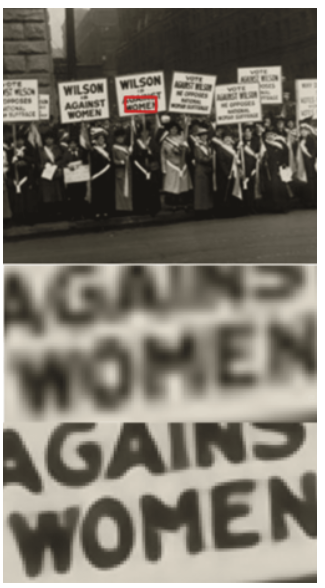

The middle we have low quality resizing after applying bicubic interpolation. And on the bottom we have the output of applying our super resolution deep learning model.

We’ll be utilizing four pre-trained super resolution models in this tutorial. A review of the model architectures, how they work, and the training process of each respective model is outside the scope of this notebook

FOR MORE ALSO CHECK THIS BLOG : https://bleedai.com/super-resolution-going-from-3x-to-8x-resolution-in-opencv/


We will use opencv's 'dnn_superes' module, there are two important points :
    * dnn_superes module was implemented in C++ back in OpenCV 4.1.2, the Python bindings were not implemented until OpenCV 4.3.
    * which works with the model of EDSR, ESPCN, FSRCNN, or LapSRN.

In [4]:
import argparse
import time
import cv2
import os


In [5]:
cv2.__version__

'4.5.1'

model scale (i.e., factor by which we’ll be increasing the image resolution):

In [6]:
model_path=r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\superresolution\pyimage_origin\opencv-super-resolution\models\EDSR_x4.pb'
modelName = model_path.split(os.path.sep)[-1].split("_")[0].lower()
modelScale = model_path.split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])

In [7]:
print(modelScale)

4


In [8]:
print(modelName)

edsr


In [9]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel(modelName, modelScale)

sr.upsample, supplying the original input image. The upsample function, as the name suggests, performs a forward pass of our OpenCV super resolution model, returning the upscaled image.

In [10]:
img_pth=r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\superresolution\pyimage_origin\opencv-super-resolution\examples\butterfly.png'

In [12]:
# load the input image and display its spatial dimensions
image = cv2.imread(img_pth)
print("[INFO] w: {}, h: {}".format(image.shape[1], image.shape[0]))

# use the super resolution model to upscale the image
# and timing how long it takes
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(end - start))

# show dimensions of the super resolution image
print("[INFO] w: {}, h: {}".format(upscaled.shape[1],upscaled.shape[0]))

[INFO] w: 400, h: 240
[INFO] super resolution took 25.561777 seconds
[INFO] w: 1600, h: 960


In [13]:
# resize the image using standard bicubic interpolation
start = time.time()
bicubic = cv2.resize(image, (upscaled.shape[1], upscaled.shape[0]),interpolation=cv2.INTER_CUBIC)
end = time.time()
print("[INFO] bicubic interpolation took {:.6f} seconds".format(end - start))

[INFO] bicubic interpolation took 0.002991 seconds


In [14]:
# show the results
cv2.imshow("Original", image)
cv2.imshow("Bicubic", bicubic)
cv2.imshow("Super Resolution", upscaled)
cv2.waitKey(0)

-1

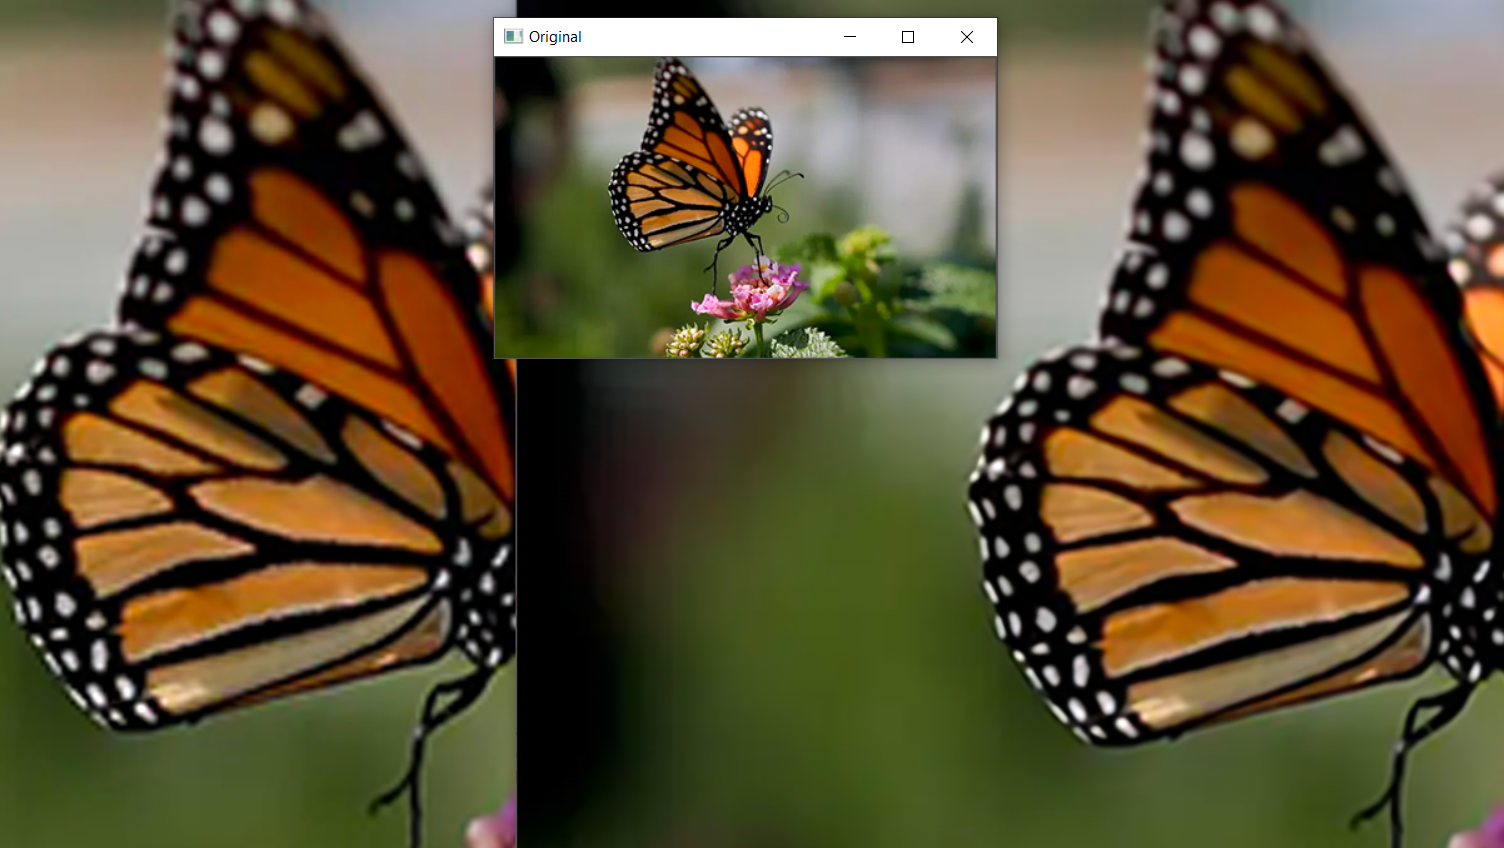

As you can see the image resize with x4 and the details on wings and legs of butterfly tells us that right on is resized with EDSR because much more smoother then left one.

Let's make same resizing process for other 3 models and see results, especially about processing time.. because if you need to use this method for real timevideo, process time will be the critical subject

WITH ESPCN_x4

In [18]:
print("[INFO] w: {}, h: {}".format(image.shape[1], image.shape[0]))

model_path=r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\superresolution\pyimage_origin\opencv-super-resolution\models\ESPCN_x4.pb'
modelName = model_path.split(os.path.sep)[-1].split("_")[0].lower()
modelScale = model_path.split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel(modelName, modelScale)
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(end - start))

print("[INFO] w: {}, h: {}".format(upscaled.shape[1],upscaled.shape[0]))


[INFO] w: 400, h: 240
[INFO] super resolution took 0.075694 seconds
[INFO] w: 1600, h: 960


In [19]:
# show the results
cv2.imshow("Original", image)
cv2.imshow("Bicubic", bicubic)
cv2.imshow("Super Resolution", upscaled)
cv2.waitKey(0)

-1

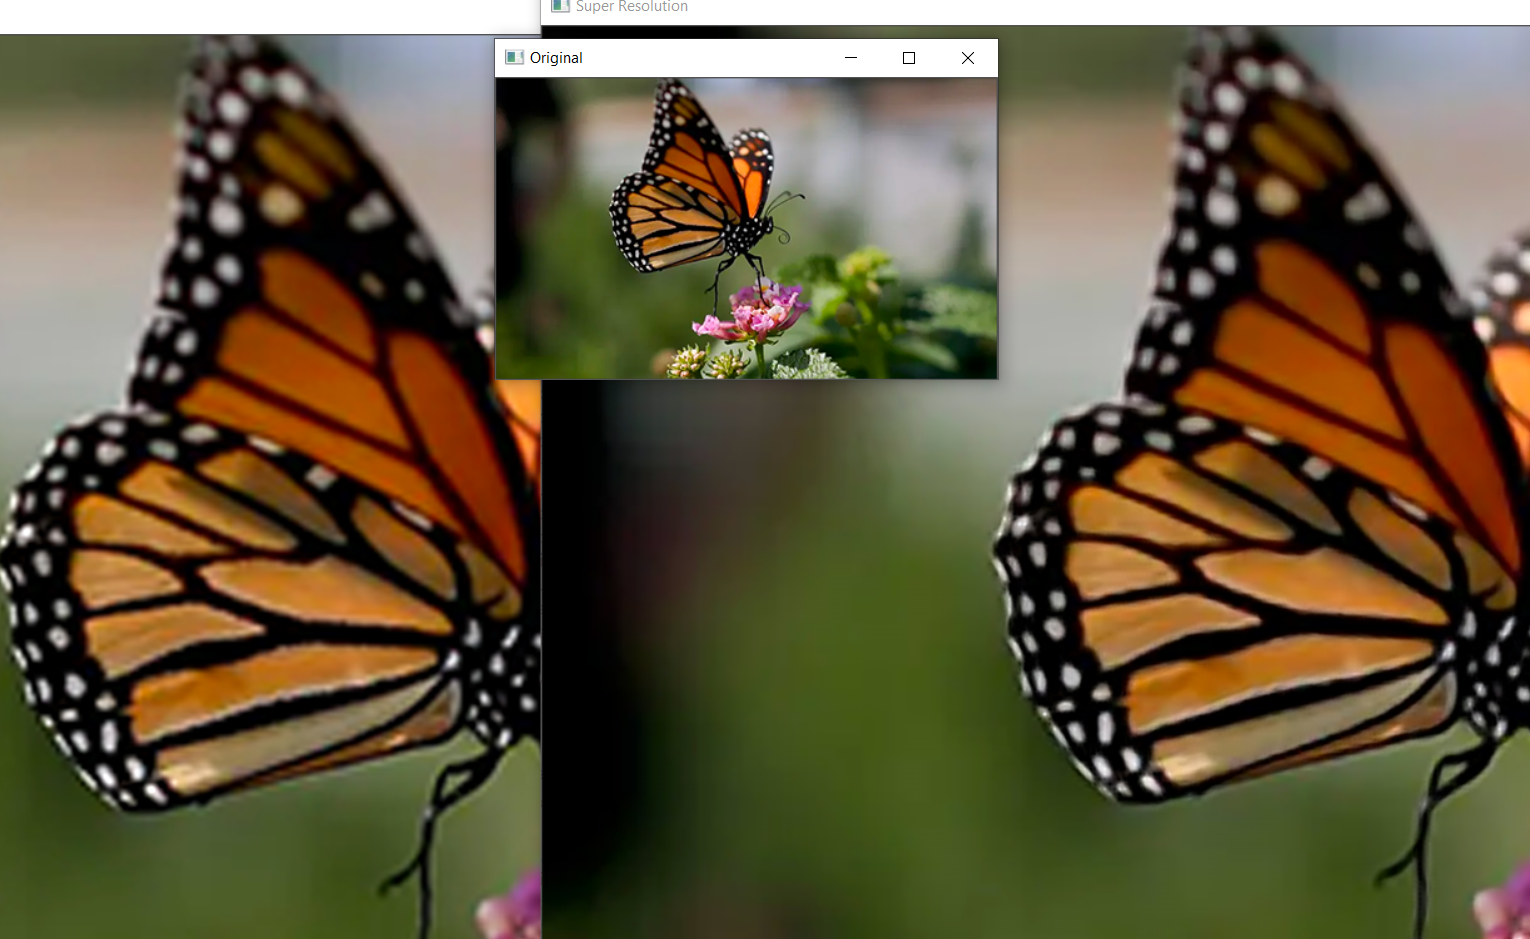

WITH FSRCNN_x3

In [23]:
print("[INFO] w: {}, h: {}".format(image.shape[1], image.shape[0]))

model_path=r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\superresolution\pyimage_origin\opencv-super-resolution\models\FSRCNN_x3.pb'
modelName = model_path.split(os.path.sep)[-1].split("_")[0].lower()
modelScale = model_path.split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel(modelName, modelScale)
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(end - start))

print("[INFO] w: {}, h: {}".format(upscaled.shape[1],upscaled.shape[0]))
# resize the image using standard bicubic interpolation
start = time.time()
bicubic = cv2.resize(image, (upscaled.shape[1], upscaled.shape[0]),interpolation=cv2.INTER_CUBIC)
end = time.time()
print("[INFO] bicubic interpolation took {:.6f} seconds".format(end - start))

[INFO] w: 400, h: 240
[INFO] super resolution took 0.078789 seconds
[INFO] w: 1200, h: 720
[INFO] bicubic interpolation took 0.001994 seconds


In [24]:
# show the results
cv2.imshow("Original", image)
cv2.imshow("Bicubic", bicubic)
cv2.imshow("Super Resolution", upscaled)
cv2.waitKey(0)

-1

This time we resize it with x3 and again the superresolution result(left side) is much better than bicubic resizing

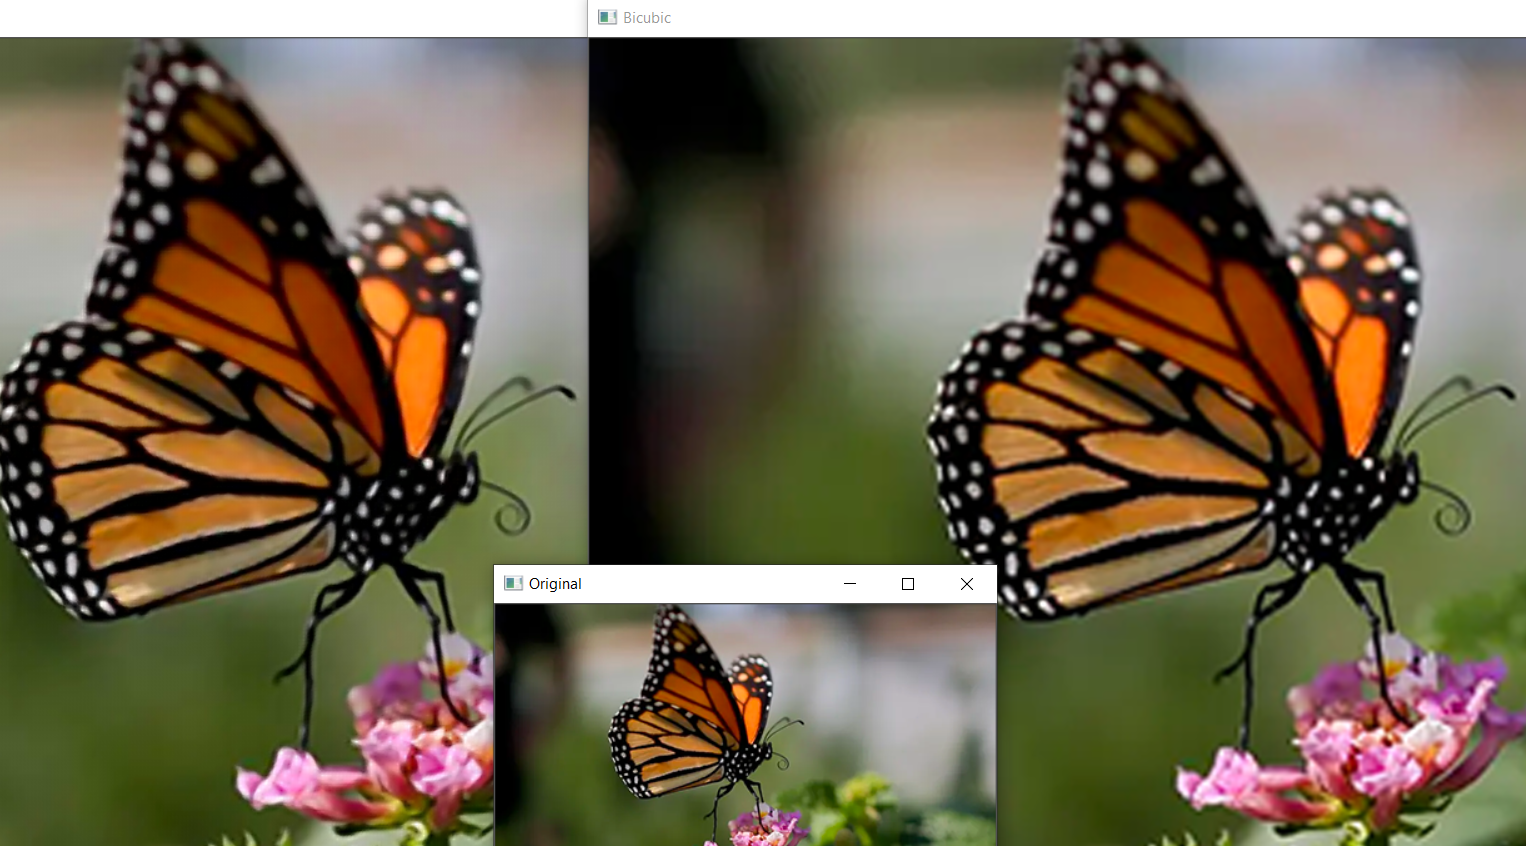

WITH LapSRN_x8

In [25]:
print("[INFO] w: {}, h: {}".format(image.shape[1], image.shape[0]))

model_path=r'C:\Users\Zeki\Desktop\kisisel calismalar\github_notebooks\superresolution\pyimage_origin\opencv-super-resolution\models\LapSRN_x8.pb'
modelName = model_path.split(os.path.sep)[-1].split("_")[0].lower()
modelScale = model_path.split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel(modelName, modelScale)
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(end - start))

print("[INFO] w: {}, h: {}".format(upscaled.shape[1],upscaled.shape[0]))
# resize the image using standard bicubic interpolation
start = time.time()
bicubic = cv2.resize(image, (upscaled.shape[1], upscaled.shape[0]),interpolation=cv2.INTER_CUBIC)
end = time.time()
print("[INFO] bicubic interpolation took {:.6f} seconds".format(end - start))

[INFO] w: 400, h: 240
[INFO] super resolution took 7.924303 seconds
[INFO] w: 3200, h: 1920
[INFO] bicubic interpolation took 0.004986 seconds


In [26]:
# show the results
cv2.imshow("Original", image)
cv2.imshow("Bicubic", bicubic)
cv2.imshow("Super Resolution", upscaled)
cv2.waitKey(0)

-1

For this image size , X8 is not a good example but you can also see the superresolution(ridgt side) effect from details on wings

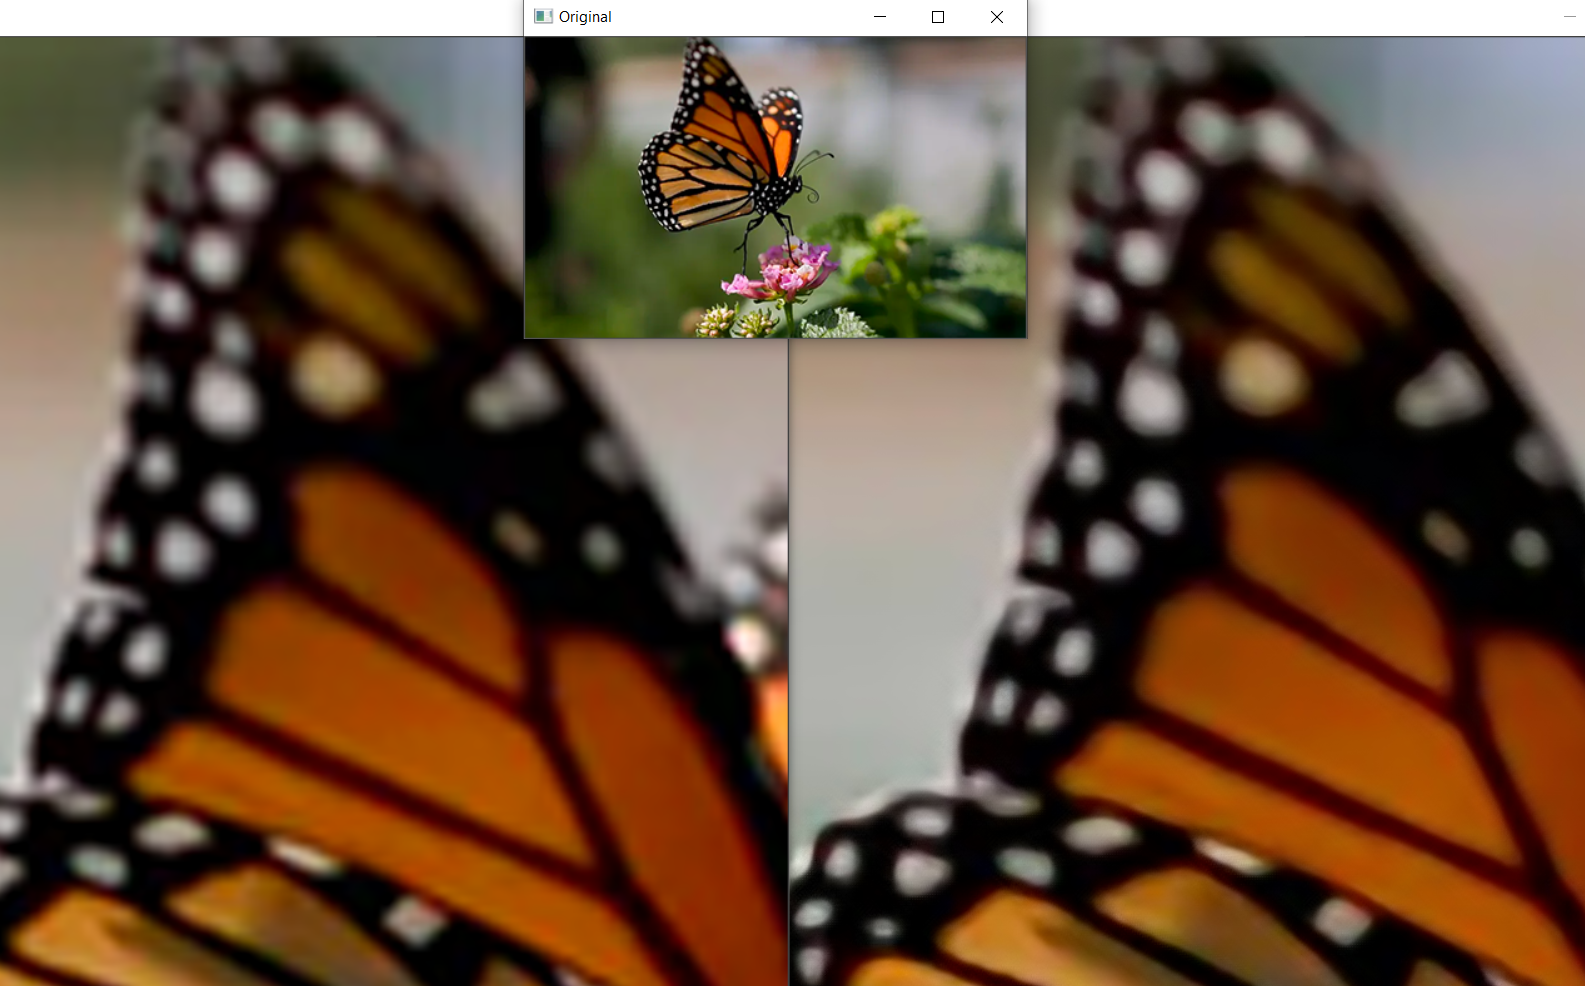